### Project : Personal Loan Campaign Modeling

Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Bank?

### Import the necessary packages

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [469]:
data=pd.read_csv("Loan_Modelling.csv")

In [470]:
# copying data to another varaible to avoid any changes to original data
camod=data.copy()

### Knowing the Data

In [471]:
camod.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [472]:
camod.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [473]:
camod.shape

(5000, 14)

In [474]:
print(camod.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


#### The dataset has 5000 rows and 14 columns of data

In [475]:
camod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIPCode               5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations:
- Some column names presents the characeres "__", however is uniform in the data set 
- There is not categorical variable
- ID, ZIPCode should show as category type

In [476]:
#Converting ZIPCode, ID and Education as Category type
camod["ZIPCode"] = camod["ZIPCode"].astype("category")
camod["ID"] = camod["ID"].astype("category")

In [477]:
camod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null category
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIPCode               5000 non-null category
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(2), float64(1), int64(11)
memory usage: 711.1 KB


### Summary of the Data set

In [478]:
camod.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,5000.00,5000.00,5000.00,1.00,nan,nan,nan,nan,nan,nan,nan
Age,5000.00,nan,nan,nan,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,nan,nan,nan,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,nan,nan,nan,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIPCode,5000.00,467.00,94720.00,169.00,nan,nan,nan,nan,nan,nan,nan
Family,5000.00,nan,nan,nan,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,nan,nan,nan,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,nan,nan,nan,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,nan,nan,nan,56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal_Loan,5000.00,nan,nan,nan,0.10,0.29,0.00,0.00,0.00,0.00,1.00


Observations:
- Age: Average age 45 years old with 20 years experience.
- Income: Min: 8000 and Max 224000
- Family: Size average of 2
- Education: Most people have level of Undergrad Education Level

In [479]:
# checking for unique values on ID
camod["ID"].nunique()

5000

In [480]:
# Dropping ID because is unique
camod.drop(["ID"],axis=1,inplace=True)

In [481]:
# Checking missing values
camod.isna().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing vaues in out dataset. (Considering the zeros in Mortgage is not missing values, but customer with no Mortgage.)

In [482]:
# Checking Unique values
camod.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

### Observations on Category and Int date type

In [483]:
num_to_display = 10
for colname in camod.dtypes[camod.dtypes == 'category'].index:
    val_counts = camod[colname].value_counts(dropna=False)# shows NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
94025     52
91711     52
Name: ZIPCode, dtype: int64
Displaying first 10 of 467 values.





Observations: 
- The Zip Code 94720 is the most seen in the dataset

In [484]:
num_to_display = 10
for colname in camod.dtypes[camod.dtypes == 'int64'].index:
    val_counts = camod[colname].value_counts(dropna=False)# shows NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
Name: Age, dtype: int64
Displaying first 10 of 45 values.



32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
Name: Experience, dtype: int64
Displaying first 10 of 47 values.



44    85
38    84
81    83
41    82
39    81
40    78
42    77
83    74
43    70
45    69
Name: Income, dtype: int64
Displaying first 10 of 162 values.



1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64



1    2096
3    1501
2    1403
Name: Education, dtype: int64



0      3462
98       17
103      16
119      16
83       16
91       16
89       16
90       15
102      15
78       15
Name: Mortgage, dtype: int64
Displaying first 10 of 347 values.



0    4520
1     480
Name: Personal_Loan, dtype: int64



0    4478
1     522
Name: Securities_Account, dtype: int64



0    4698
1     302
Name: CD_Account, dtype: int64



1    2984
0    2016
Nam

Observations 
- The population age is between 34 to 56
- Most customer have more than 20 years experience 
- Morgage: Value of house mortgage if any. 3462 customer shows as zero in Mortgage. Possible renters.
- Most of the customers dont have personal loans
- Most of the customers dont have Security account
- Most of the customers dont have Cerfied Deposit
- Most customers use internet banking facilities
- Most customers dont use a credit card issued by the Bank
- As we observed before, most people is undergrade education level


In [485]:
print(camod.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


## Univariate Analysis using Barplots

In [486]:
# Function to create barplots of each column

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Checking Securities_Account

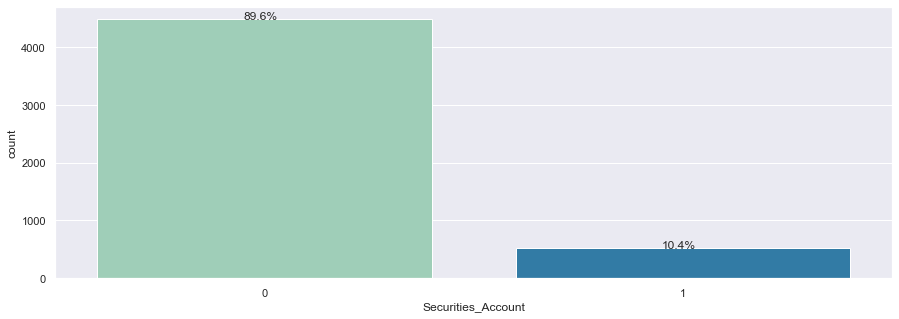

In [487]:
plt.figure(figsize=(15,5))
ax = sns.countplot(camod["Securities_Account"],palette='YlGnBu')
perc_on_bar(ax,camod["Securities_Account"])

Only 10,4 % of the customer have Security_Account

### Checking CD_Account

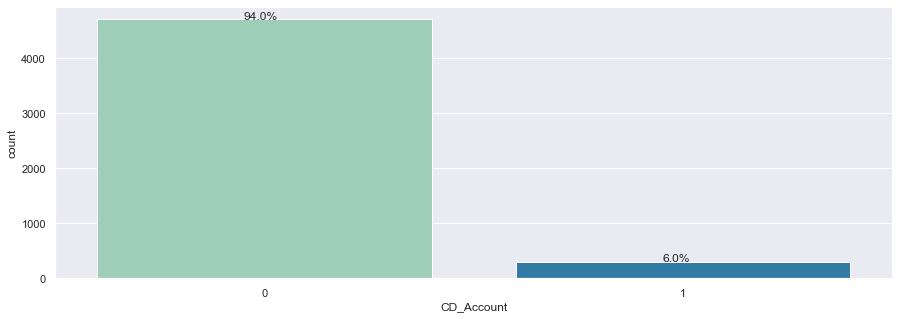

In [488]:
plt.figure(figsize=(15,5))
ax = sns.countplot(camod["CD_Account"],palette='YlGnBu')
perc_on_bar(ax,camod["CD_Account"])

Only 6 % of the customer have a certificate of deposit (CD) account with the bank

### Checking Online

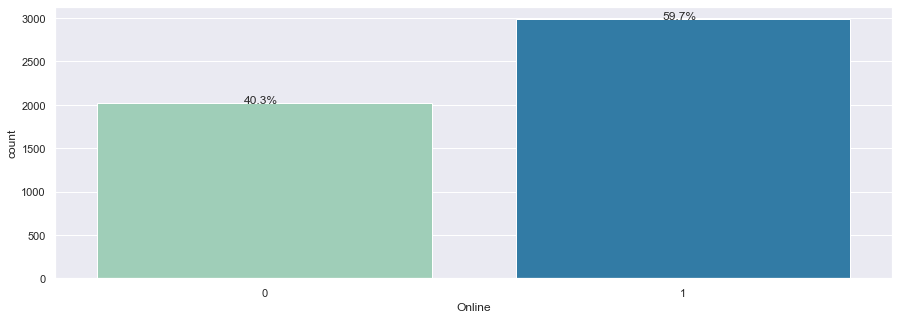

In [489]:
plt.figure(figsize=(15,5))
ax = sns.countplot(camod["Online"],palette='YlGnBu')
perc_on_bar(ax,camod["Online"])

59.7 % of the customers use internet banking facilities

### Checking Credit Card

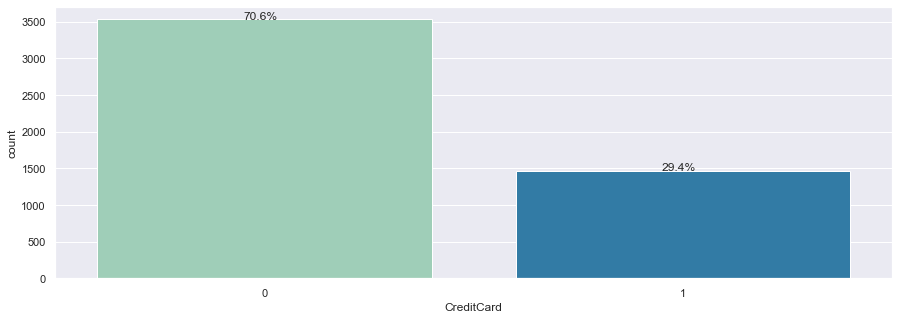

In [490]:
plt.figure(figsize=(15,5))
ax = sns.countplot(camod["CreditCard"],palette='YlGnBu')
perc_on_bar(ax,camod["CreditCard"])

29,4 % of the customers use a credit card issued by the Bank

### Checking Personal Loans

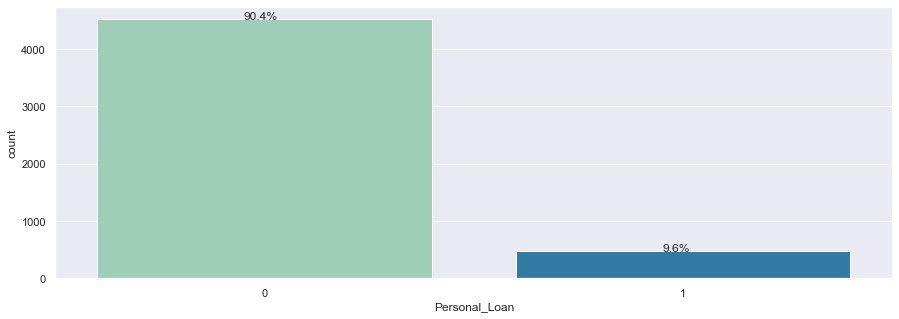

In [491]:
plt.figure(figsize=(15,5))
ax = sns.countplot(camod["Personal_Loan"],palette='YlGnBu')
perc_on_bar(ax,camod["Personal_Loan"])

9.6% accepted the personal loan offered in the last campaign

### Checking Education

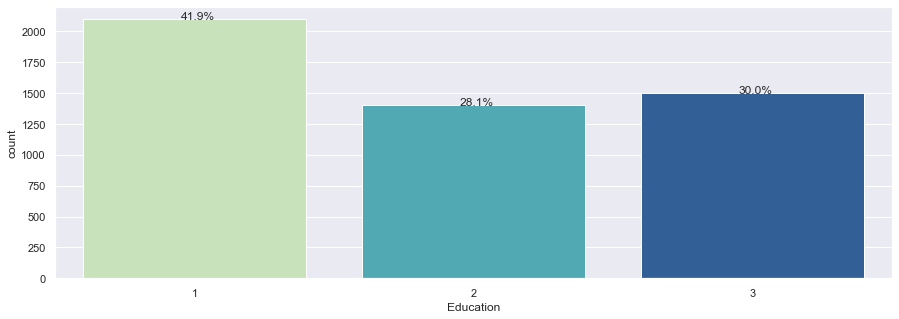

In [492]:
plt.figure(figsize=(15,5))
ax = sns.countplot(camod["Education"],palette='YlGnBu')
perc_on_bar(ax,camod["Education"])

Education Level. 41.9% Undergrad; 28.1% Graduate; 30% Advanced/Professional

### Checking Family 

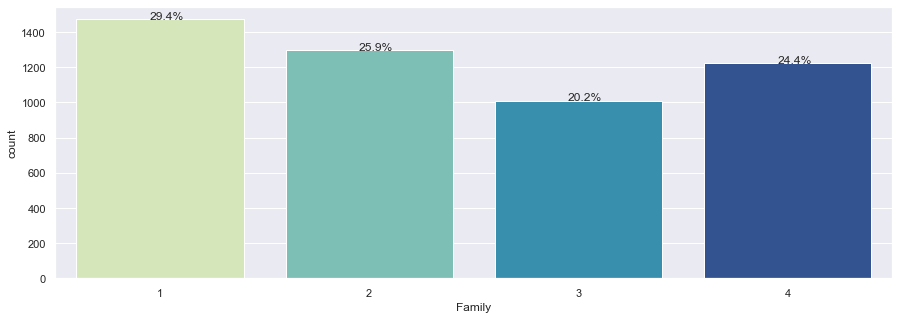

In [493]:
plt.figure(figsize=(15,5))
ax = sns.countplot(camod["Family"],palette='YlGnBu')
perc_on_bar(ax,camod["Family"])

Family size of the customer: 
1. 29.4%
2. 25.9%
3. 20.2%
4. 24.4%

### Checking Age

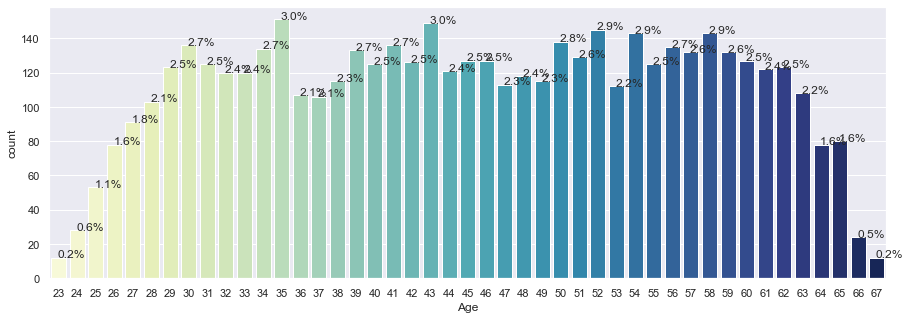

In [494]:
plt.figure(figsize=(15,5))
ax = sns.countplot(camod["Age"],palette='YlGnBu')
perc_on_bar(ax,camod["Age"])

Age range 23 to 67, however the big group is between 36 to 56 range

## Checking Numerical Columns using Histogram

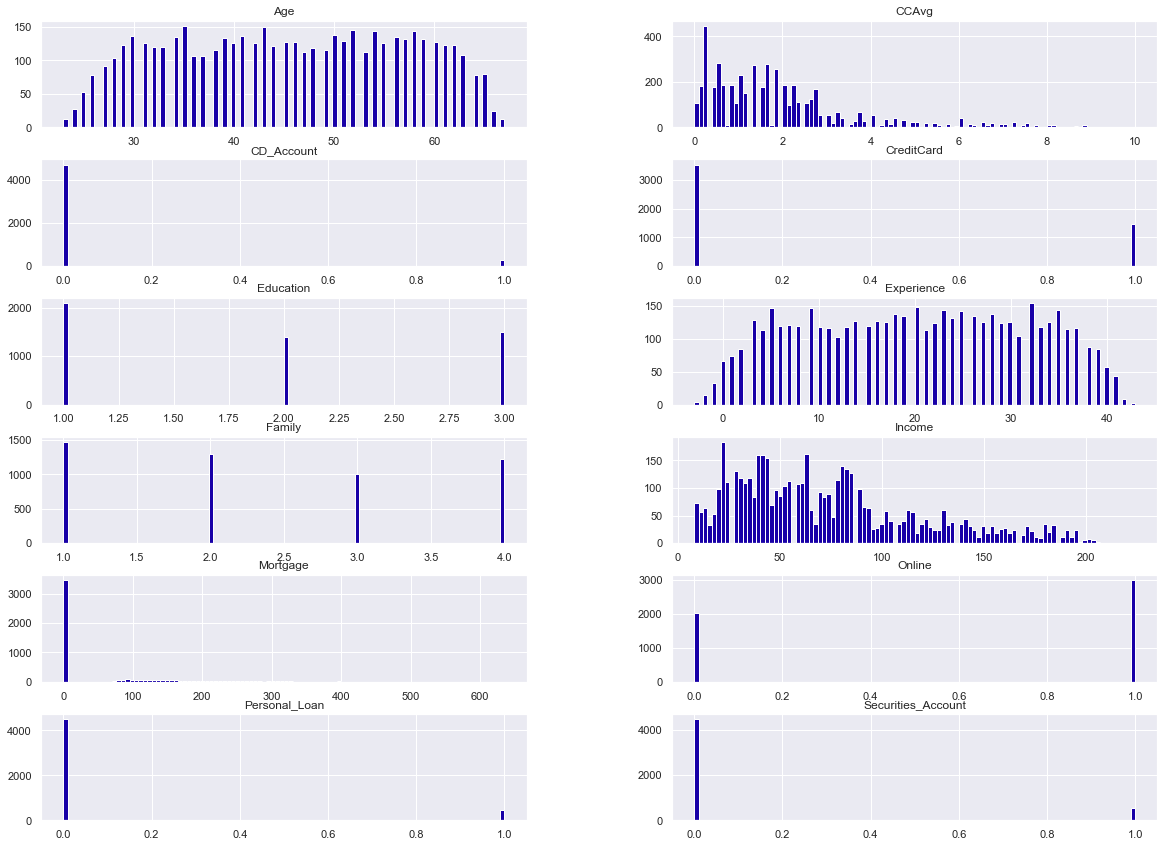

In [495]:
columns = list(camod) #Including all columns
camod[columns].hist(stacked=False, bins=100, figsize=(20,30), layout=(12,2)); 


## Univariate Analysis using Histogram_Boxplot. (Also identify outliears)

In [496]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.15, .50)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='blue') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

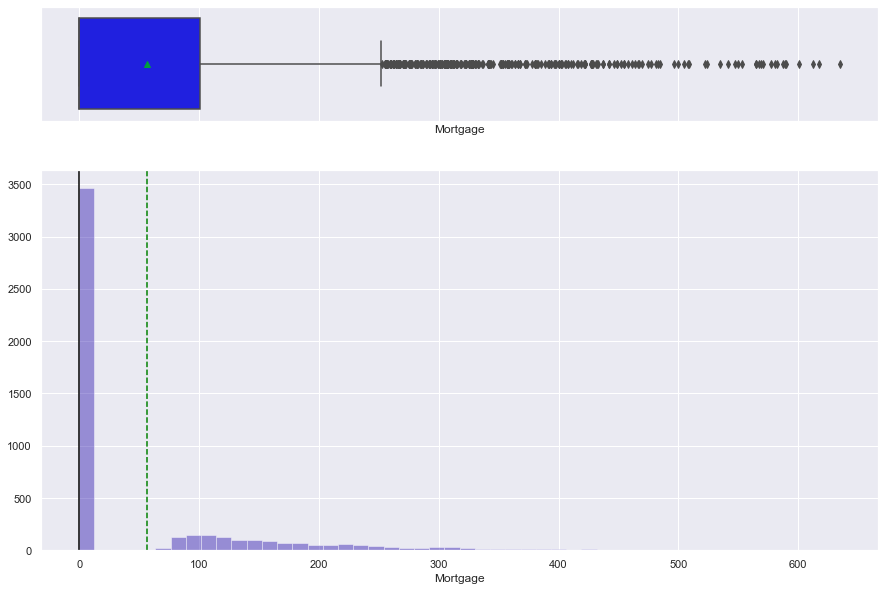

In [497]:
histogram_boxplot(camod.Mortgage)

Observations : 

- The distribution of Mortgage is high right-skewed. 
- As we expected based on the previous observations since Mortgage is presented if any. 

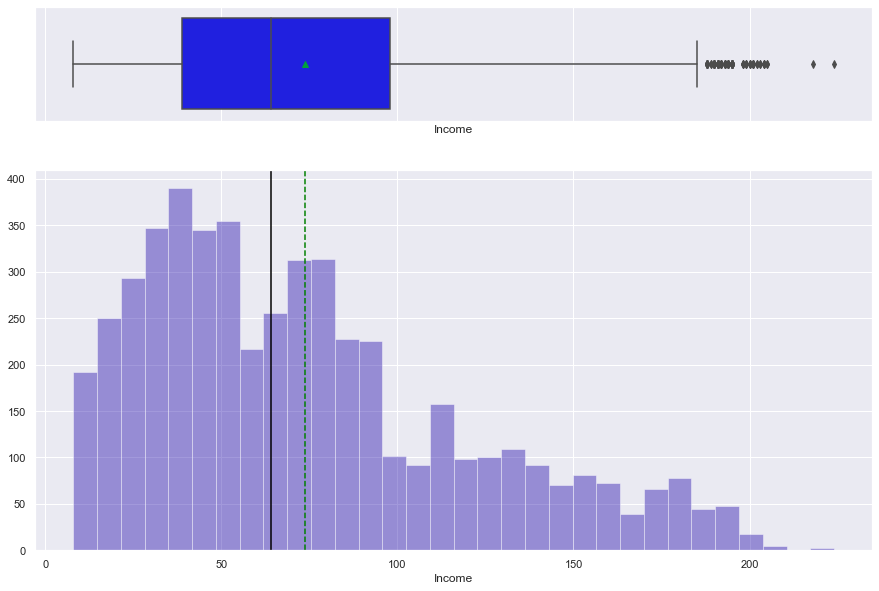

In [498]:
histogram_boxplot(camod.Income)

Observations : Consider Income is Annual income of the customer (in thousand dollars)
- The distribution of Income is low right skewed
- Majority of the Income are < 60.000,00
- Median Price is ~55 but the mean is ~65 (in thousand dollars)

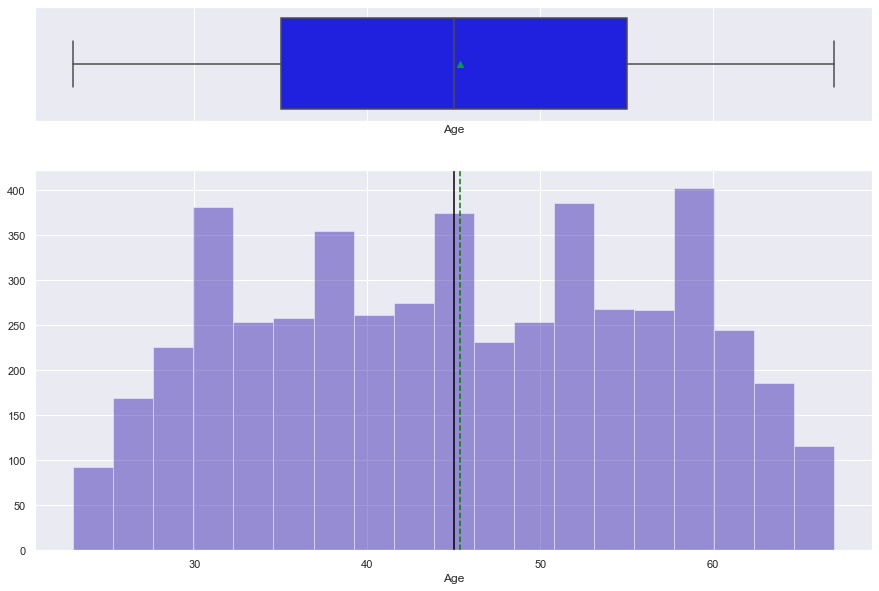

In [499]:
histogram_boxplot(camod.Age)

Observations: 
- Strong pattern found on age.
- No right or left skewed

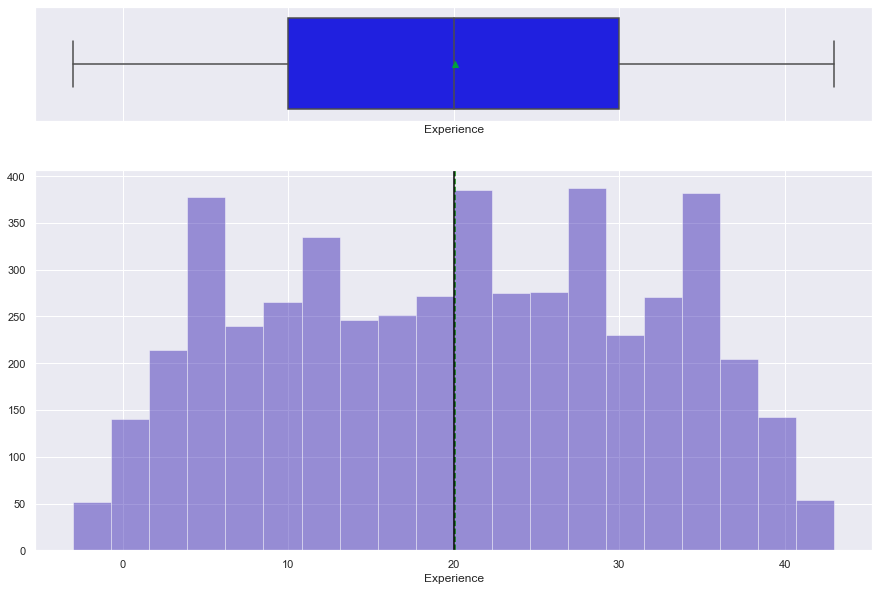

In [500]:
histogram_boxplot(camod.Experience)

Observations:

- Strong pattern found on Experience.
- Mean and Medium is 20 years of experience

## Identify Correlation

In [501]:
camod.corr() # Show correlation matrix 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.00,0.99,-0.06,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,0.99,1.00,-0.05,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.06,-0.05,1.00,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
Family,-0.05,-0.05,-0.16,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.05,-0.05,0.65,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.04,0.01,-0.19,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,0.21,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal_Loan,-0.01,-0.01,0.50,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00
Securities_Account,-0.00,-0.00,-0.00,0.02,0.02,-0.01,-0.01,0.02,1.00,0.32,0.01,-0.02
CD_Account,0.01,0.01,0.17,0.01,0.14,0.01,0.09,0.32,0.32,1.00,0.18,0.28


In [502]:
# This is correlation in graphical representation
def plot_corr(camod, size=18):
    corr = camod.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap='coolwarm')
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

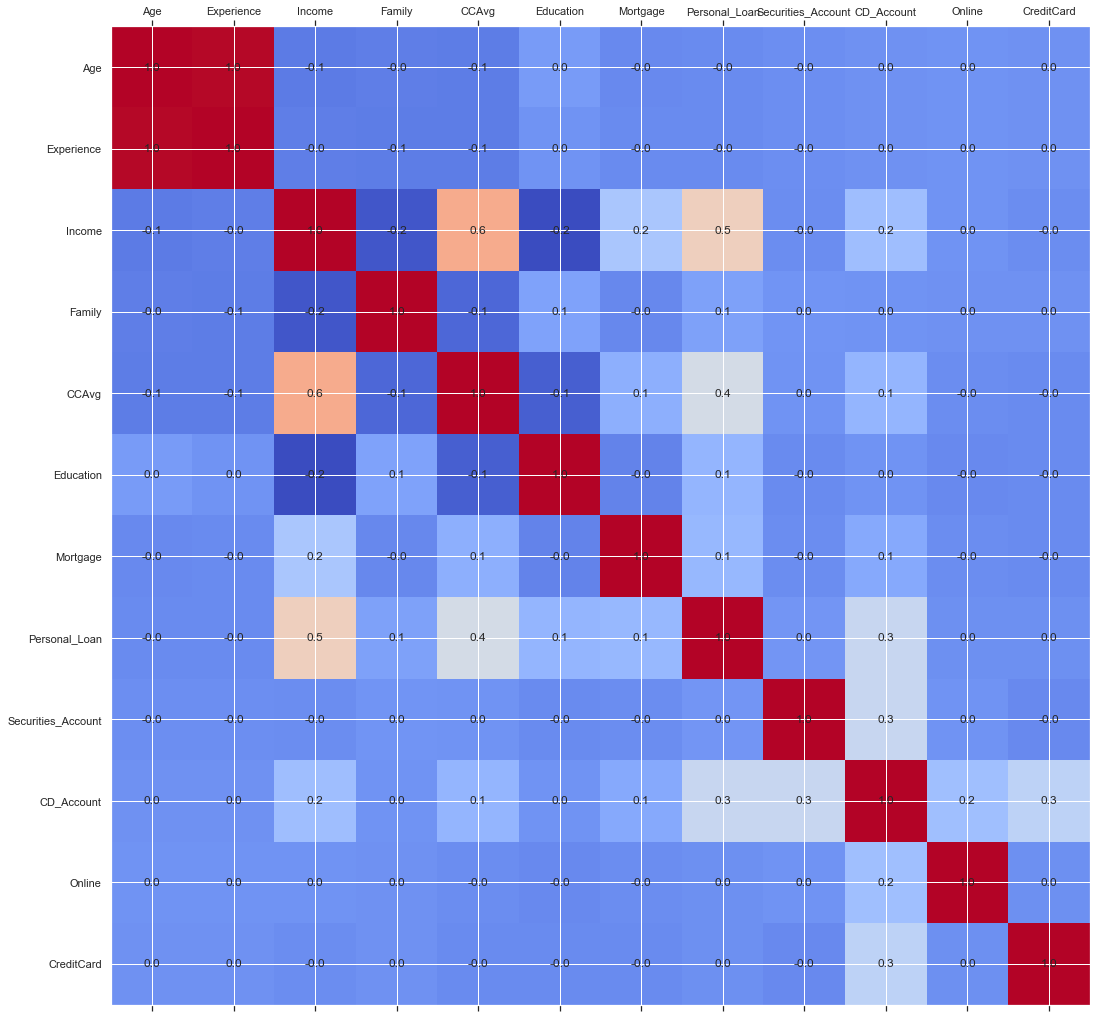

In [250]:
plot_corr(camod)

Income has a correlation with most of the other values

## Bivariate Analysis
### with Personal Loan 

In [503]:
print(camod.columns)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [620]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='YlGnBu')
    tab1 = pd.crosstab(x,camod['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,camod['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(20,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

### Checking Income and Personal Loan

Personal_Loan     0    1   All
Income                        
8                23    0    23
9                26    0    26
10               23    0    23
11               27    0    27
12               30    0    30
13               32    0    32
14               31    0    31
15               33    0    33
18               53    0    53
19               52    0    52
20               47    0    47
21               65    0    65
22               65    0    65
23               54    0    54
24               47    0    47
25               64    0    64
28               63    0    63
29               67    0    67
30               63    0    63
31               55    0    55
32               58    0    58
33               51    0    51
34               53    0    53
35               65    0    65
38               84    0    84
39               81    0    81
40               78    0    78
41               82    0    82
42               77    0    77
43               70    0    70
...     

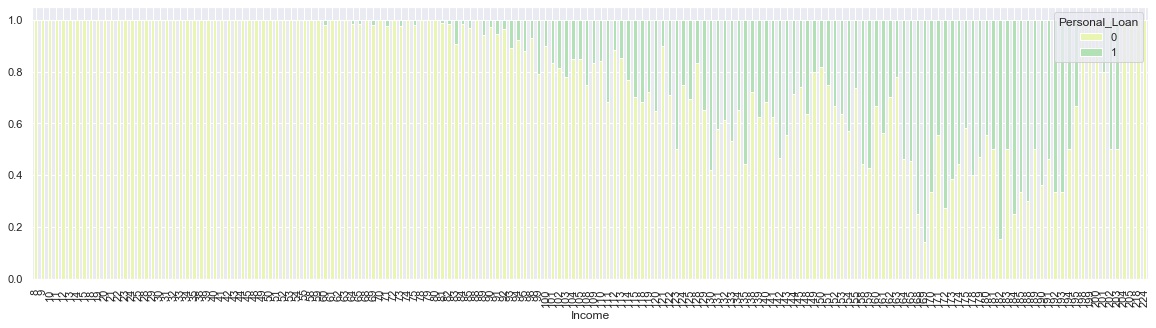

In [621]:
stacked_plot(camod['Income'])

Customer with income >150,000 had Personal Loan in the past

### Checking Age and Personal Loan

Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49              105   10   115
50              125   13   138
51              119   10   129
52              130   15   145
53      

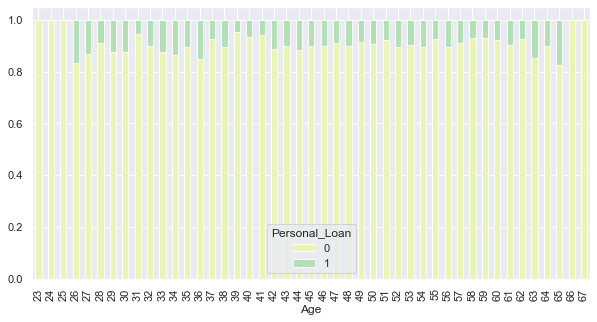

In [507]:
stacked_plot(camod['Age'])

Customer with Age group 30 to 40 had personal loan in the past 

### Checking Mortgage and Personal Loan

Personal_Loan     0    1   All
Mortgage                      
0              3150  312  3462
75                7    1     8
76               11    1    12
77                4    0     4
78               15    0    15
79               11    0    11
80                7    0     7
81               12    1    13
82                9    1    10
83               16    0    16
84               10    1    11
85                7    0     7
86                9    2    11
87               14    0    14
88                8    1     9
89               16    0    16
90               15    0    15
91               15    1    16
92                4    0     4
93                4    0     4
94               13    1    14
95               11    0    11
96                7    0     7
97               11    1    12
98               17    0    17
99                4    2     6
100              12    0    12
101              14    0    14
102              15    0    15
103              16    0    16
...     

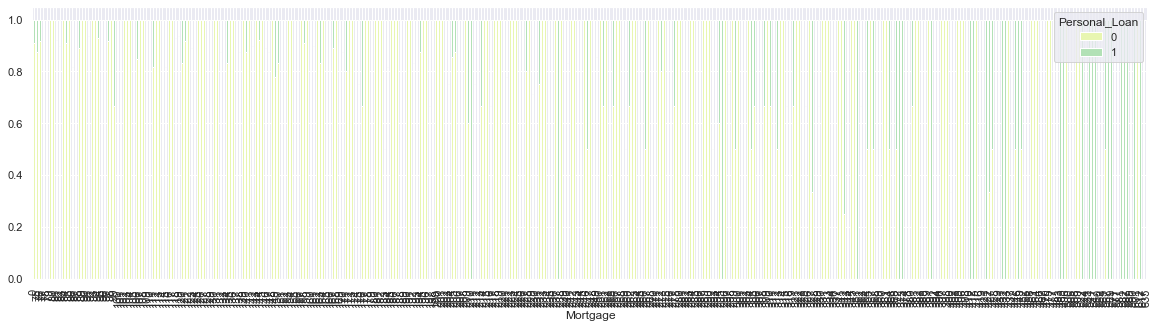

In [622]:
stacked_plot(camod['Mortgage'])

Customers with no mortgage accepted Personal Loan in the past

### Checking Credit Card and Personal Loan

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


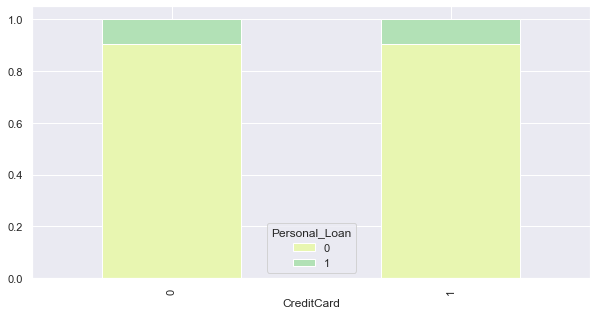

In [509]:
stacked_plot(camod['CreditCard'])

337 customer that dont use the bank credit accepted the Personal Loan in the past

### Checking Securities Account and Personal Loan

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


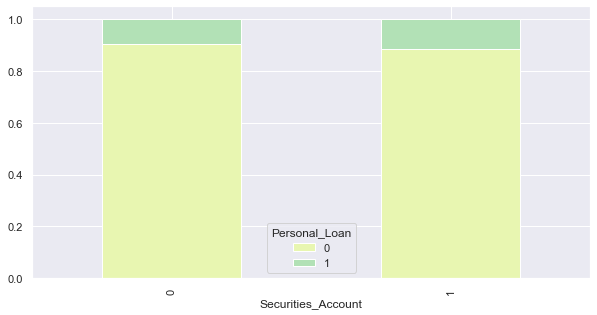

In [510]:
stacked_plot(camod['Securities_Account'])

420 customers that dont have securities account with the bank accepted the Personal Loan in the past

### Checking CD_Account and Personal Loan

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


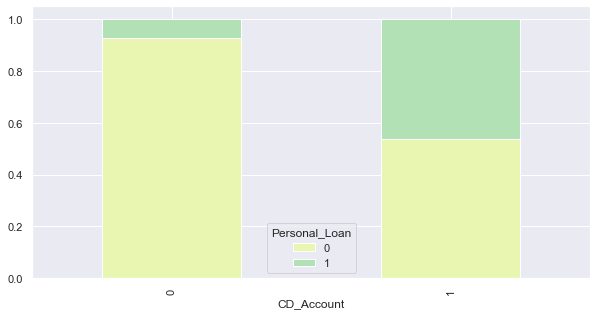

In [511]:
stacked_plot(camod['CD_Account'])

340 customers that dont have the certificate of deposit (CD) account with the bank accepted the Personal Loan in the past

### Checking Online and Personal Loan

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


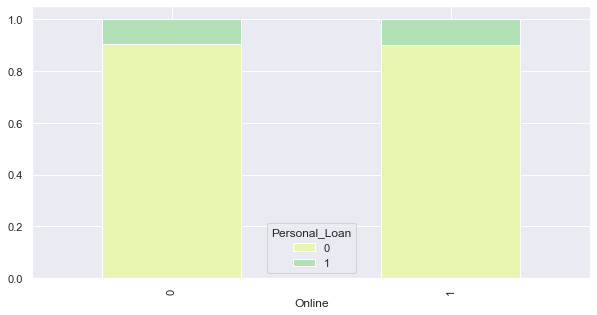

In [512]:
stacked_plot(camod['Online'])

291 customers that use internet banking facilities also had Personal Loan in the past

### Checking Family and Personal Loan

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


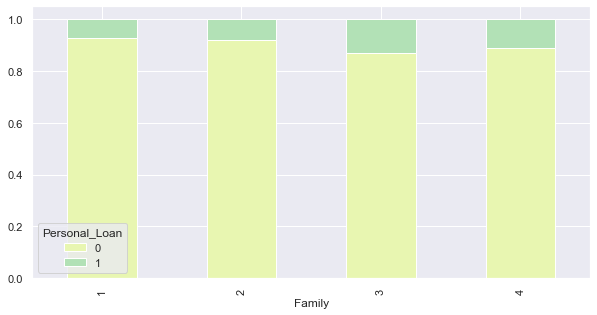

In [513]:
stacked_plot(camod['Family'])

Families Size of 3 or more tend to accept Personal Loans

## Key Observations
Based on the behavior observed in the customer that accepted the personal loan offered in the last campaign:

- The customer that interacts with the bank online, tends to beware of benefits and promotions. Can be a good customer to target.
- Also customers with medium to a big family, with no mortgage in place.
- Customer that dont have security accounts

## We observed that a good Income may create a chance to encourage customers to accept a Personal Loan:

Organizing the column Income in 3 big groups, using new column name Income2

In [514]:
Income_sort = camod.Income.unique()
Income_sort.sort()
Income_sort

array([  8,   9,  10,  11,  12,  13,  14,  15,  18,  19,  20,  21,  22,
        23,  24,  25,  28,  29,  30,  31,  32,  33,  34,  35,  38,  39,
        40,  41,  42,  43,  44,  45,  48,  49,  50,  51,  52,  53,  54,
        55,  58,  59,  60,  61,  62,  63,  64,  65,  68,  69,  70,  71,
        72,  73,  74,  75,  78,  79,  80,  81,  82,  83,  84,  85,  88,
        89,  90,  91,  92,  93,  94,  95,  98,  99, 100, 101, 102, 103,
       104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120,
       121, 122, 123, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135,
       138, 139, 140, 141, 142, 143, 144, 145, 148, 149, 150, 151, 152,
       153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 168, 169,
       170, 171, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 184,
       185, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 201,
       202, 203, 204, 205, 218, 224], dtype=int64)

In [515]:
conditions = [
    (camod["Income"] <= 49),
    (camod["Income"] >= 50) & (camod["Income"] <= 149),
    (camod["Income"] >= 150) & (camod["Income"] <= 250),
    ]
values = ['<=49', '50_149', '150_250']
camod['Income2'] = np.select(conditions, values)
camod.head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Income2
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0,<=49
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0,<=49
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0,<=49
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0,50_149
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1,<=49


In [516]:
def stacked_plot_Income2(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,camod['Income2'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,camod['Income2'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

### Checking Personal LOand and Income 2

Income2        150_250  50_149  <=49   All
Personal_Loan                             
0                  233    2418  1869  4520
1                  220     260     0   480
All                453    2678  1869  5000
------------------------------------------------------------------------------------------------------------------------


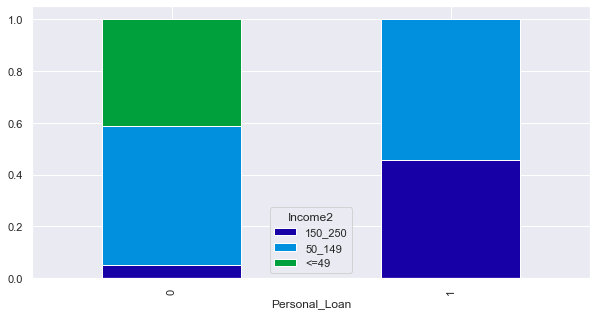

In [517]:
stacked_plot_Income2(camod['Personal_Loan'])

### Checking Online and Income 2

Income2  150_250  50_149  <=49   All
Online                              
0            174    1091   751  2016
1            279    1587  1118  2984
All          453    2678  1869  5000
------------------------------------------------------------------------------------------------------------------------


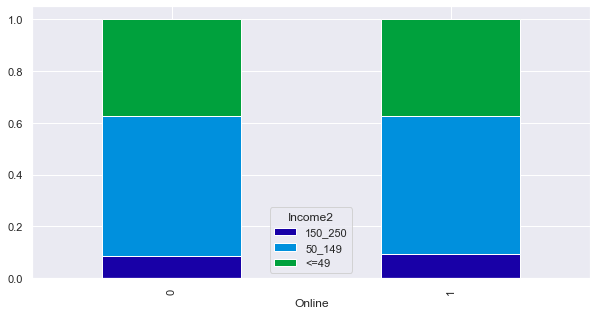

In [518]:
stacked_plot_Income2(camod['Online'])

### Checking Education and Income 2

Income2    150_250  50_149  <=49   All
Education                             
1              267    1221   608  2096
2               84     678   641  1403
3              102     779   620  1501
All            453    2678  1869  5000
------------------------------------------------------------------------------------------------------------------------


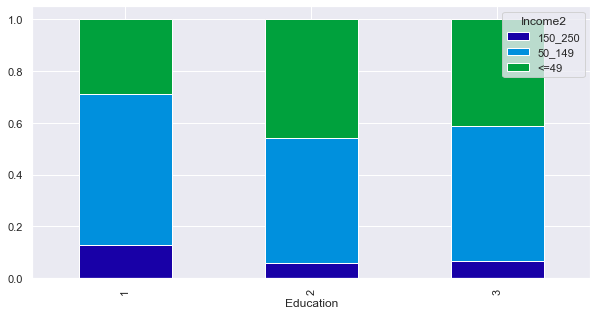

In [519]:
stacked_plot_Income2(camod['Education'])

### Checking Age and Income 2

Income2  150_250  50_149  <=49   All
Age                                 
23             0       8     4    12
24             1      17    10    28
25             1      31    21    53
26            14      41    23    78
27             4      57    30    91
28            11      60    32   103
29            14      66    43   123
30            16      64    56   136
31            11      62    52   125
32             5      69    46   120
33            10      65    45   120
34            17      66    51   134
35            15      77    59   151
36            15      48    44   107
37            15      61    30   106
38            11      67    37   115
39             7      83    43   133
40            10      77    38   125
41            11      82    43   136
42            11      69    46   126
43            14      90    45   149
44            14      71    36   121
45            18      63    46   127
46            16      74    37   127
47            10      58    45   113
4

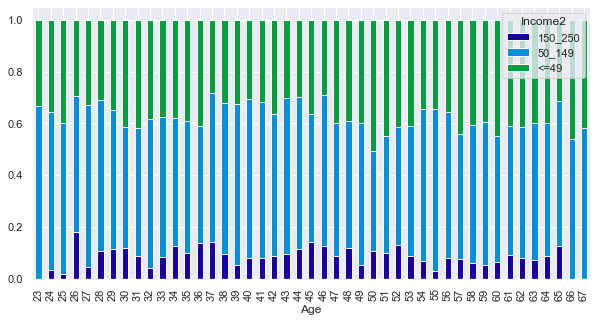

In [520]:
stacked_plot_Income2(camod['Age'])

### Checking Credit Card and Income 2

Income2     150_250  50_149  <=49   All
CreditCard                             
0               318    1908  1304  3530
1               135     770   565  1470
All             453    2678  1869  5000
------------------------------------------------------------------------------------------------------------------------


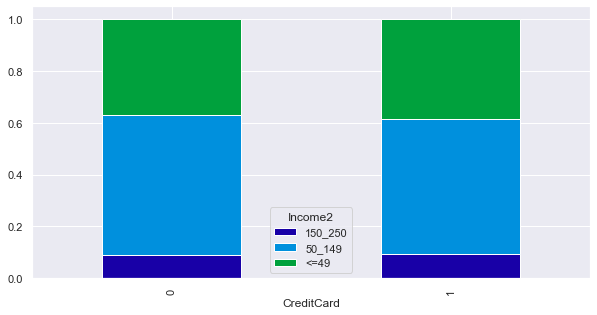

In [521]:
stacked_plot_Income2(camod['CreditCard'])

## Key Observations

1.  Income can impact several other values and can be considered a strong key

### Using Chi-Square test as statistical method to determine if Income2, Age, Family and Mortgage have a significant correlation betwenn Personal_Loan.

Null Hypothesis - There is no association between the two variables.
Alternate Hypothesis - There is an association between two variables.

In [526]:
crosstab = pd.crosstab(camod['Income2'],camod['Personal_Loan']) 

Ho = "Income2 has no effect on Personal_Loan"   # Stating the Null Hypothesis
Ha = "Income2 has an effect on Personal_Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Income2 has an effect on Personal_Loan as the p_value (0.0) < 0.05


In [527]:
crosstab = pd.crosstab(camod['Income2'],camod['Age'])

Ho = "Income2 has no effect on Age"   # Stating the Null Hypothesis
Ha = "Income2 has an effect on Age"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Income2 has an effect on Age as the p_value (0.009) < 0.05


In [530]:
crosstab = pd.crosstab(camod['Income2'],camod['Family'])

Ho = "Income2 has no effect on Family"   # Stating the Null Hypothesis
Ha = "Income2 has an effect on Family"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Income2 has an effect on Family as the p_value (0.0) < 0.05


In [531]:
crosstab = pd.crosstab(camod['Income2'],camod['Mortgage'])

Ho = "Income2 has no effect on Mortgage"   # Stating the Null Hypothesis
Ha = "Income2 has an effect on Mortgage"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Income2 has an effect on Mortgage as the p_value (0.0) < 0.05


In [532]:
crosstab = pd.crosstab(camod['Income2'],camod['ZIPCode'])

Ho = "Income2 has no effect on Zip Code"   # Stating the Null Hypothesis
Ha = "Income2 has an effect on Zip Code"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Income2 has no effect on Zip Code as the p_value (0.595) > 0.05


In [533]:
crosstab = pd.crosstab(camod['Personal_Loan'],camod['ZIPCode'])

Ho = "Personal_Loan has no effect on Zip Code"   # Stating the Null Hypothesis
Ha = "Personal_Loan an effect on Zip Code"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Personal_Loan has no effect on Zip Code as the p_value (0.76) > 0.05


### Key Observations-
P-value for all tests < 0.01. Hence, all the differences that we see in the 3 plots are statistically significant.
- There is a correlation between Income2 and Personal_Loan. 
- There is a correlation between Income2 and Age.
- There is a correlation between Income2 and Mortgage
- There is no strong correlation with Zip Code, so this columns would be dropped in further analysis

## Model Building

In [302]:
camod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null category
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Income2               5000 non-null object
dtypes: category(1), float64(1), int64(10), object(1)
memory usage: 475.3+ KB


## Data Preparation

In [303]:
# Dropping Zip Code because of so many unique values
camod.drop(["ZIPCode"],axis=1,inplace=True)

KeyError: "['ZIPCode'] not found in axis"

In [304]:
# Transforming data Type on Income2 into Category
camod["Income2"] = camod["Income2"].astype("category")

In [273]:
camod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null category
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Income2               5000 non-null category
dtypes: category(2), float64(1), int64(10)
memory usage: 441.2 KB


## Split Data

In [306]:
## Defining X and Y variables
x = camod.drop(["Personal_Loan"], axis=1)
y = camod["Personal_Loan"]

print(x.head())
print(y.head())

  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0  25           1      49       4    1.6          1         0   
1  45          19      34       3    1.5          1         0   
2  39          15      11       1    1.0          1         0   
3  35           9     100       1    2.7          2         0   
4  35           8      45       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard Income2  
0                   1           0       0           0    <=49  
1                   1           0       0           0    <=49  
2                   0           0       0           0    <=49  
3                   0           0       0           0  50_149  
4                   0           0       0           1    <=49  
0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64


#### Observations 
- Dependent Variable y = Personal_Loan
- Key Variables with strong Relationship with Personal_Loan: Income, Family, CCavg, Mortgage, Security Account, CD_Account, Online, Credit Card. Key Variables with not so strong Relationship, but still can influence the Personal Loan: Age, Experience, Education

In [307]:
# Dummy Variables: encoding the categorical variables
x = pd.get_dummies(x, drop_first=True)
x.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,...,Age_27,Age_66,Age_24,Age_52,Age_26,Age_64,Age_63,Age_23,Income2_50_149,Income2_<=49
0,1,49,4,1.6,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,19,34,3,1.5,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,11,1,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9,100,1,2.7,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8,45,4,1.0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [308]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4 , random_state=1)

In [309]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3000, 56)
(2000, 56)
(3000,)
(2000,)


In [310]:
print("{0:0.2f}% data is in training set".format((len(xtrain)/len(camod.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(xtest)/len(camod.index)) * 100))

60.00% data is in training set
40.00% data is in test set


## Model building - Logistic Regression

In [313]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Performance
### Prediction on Train

In [319]:
#Predict for train set
predic_train = model.predict(xtrain)

from sklearn.metrics import classification_report,confusion_matrix
#mat_train = confusion_matrix(y_train,pred_train)


def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['above 50K','below 50K']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

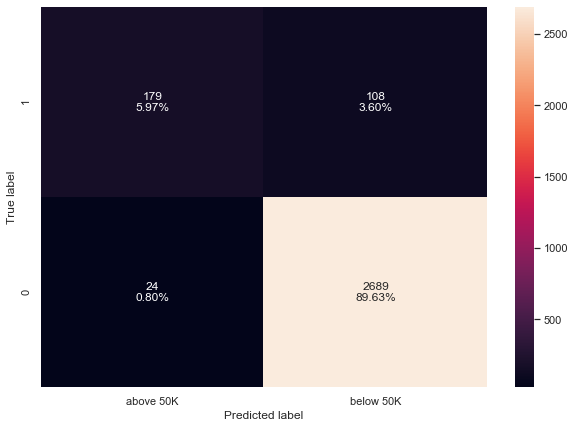

In [320]:
# let us make confusion matrix on train set
make_confusion_matrix(ytrain,predic_train)

### Prediction on Test Set

confusion matrix = 



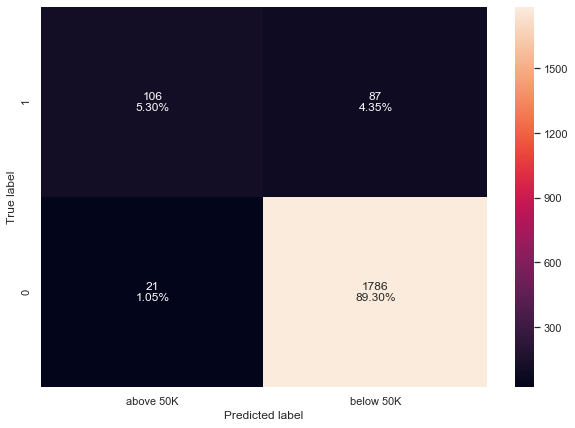

In [321]:
#Predict for test set
predic_test = model.predict(xtest)


print("confusion matrix = \n")
make_confusion_matrix(ytest,predic_test)

In [323]:
#Accuracy with a threhold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(ytrain, predic_train) )
print('Accuracy on test data:',accuracy_score(ytest, predic_test))

Accuracy on train data: 0.956
Accuracy on test data: 0.946


In [324]:
model_score = model.score(xtest, ytest)
print(model_score)

0.946


### The confusion matrix
- Model with high accuracy. Train and test are very similar.

True Positives (TP): we correctly predicted Train: 179 - Test: 106

True Negatives (TN): we correctly predicted Train: 2689 - Test: 1786

False Positives (FP): we incorrectly predicted (a "Type I error") Falsely predict positive Type I error Train: 108 - Test:87

False Negatives (FN): we incorrectly predicted (a "Type II error") Falsely predict negative Type II error Train:24 - Test: 21

## AUC ROC curve

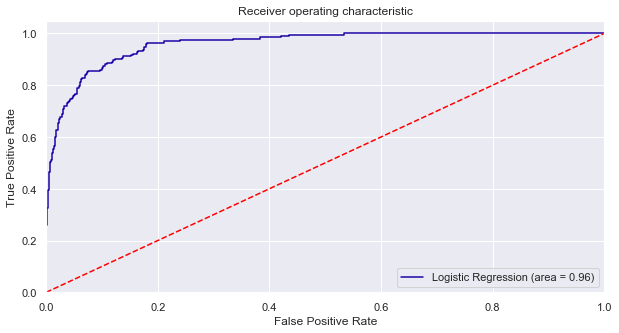

In [328]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(ytest, model.predict_proba(xtest)[:,1])
fpr, tpr, thresholds = roc_curve(ytest, model.predict_proba(xtest)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Optimal threshold

In [329]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(ytest, model.predict_proba(xtest)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.07299166806690935


In [330]:
target_names = ['below 50K', 'above 50K']
y_pred_tr = (model.predict_proba(xtrain)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (model.predict_proba(xtest)[:,1]>optimal_threshold).astype(int)

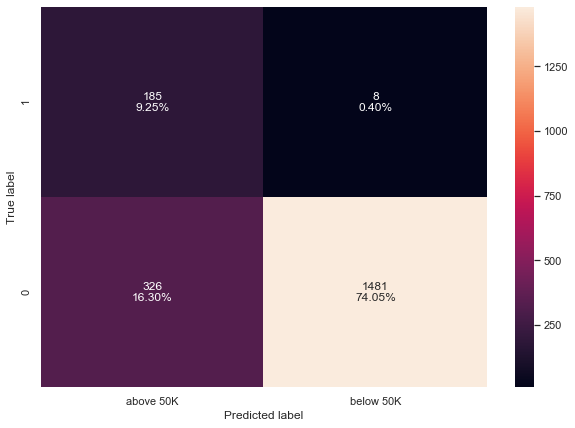

In [331]:
make_confusion_matrix(ytest,y_pred_ts)

In [332]:
#Accuracy with optimal threhold
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(ytrain, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(ytest, y_pred_ts))


Accuracy on train data: 0.828
Accuracy on test data: 0.833


### Observation

After using optimal threshold the true positives have increased from 5.30% to 9.25% and false positive has decreased from 4.35% to 0.40%.

## Checking Multicollinearity

In [336]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [338]:
# dataframe with numerical column only
num_feature_set = x.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [396]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 201.841044
Experience             95.481858
Income                  5.876386
Family                  1.066566
CCAvg                   1.759743
Education               1.135352
Mortgage                1.061343
Securities_Account      1.149971
CD_Account              1.354290
Online                  1.047855
CreditCard              1.118353
Age_45                 10.280734
Age_39                  6.985782
Age_35                  5.669157
Age_37                  5.047770
Age_53                 15.091251
Age_50                 15.303998
Age_34                  4.933187
Age_65                 20.579431
Age_29                  3.482220
Age_48                 11.829428
Age_59                 24.898977
Age_67                  4.266032
Age_60                 24.827248
Age_38                  5.800035
Age_42                  8.453623
Age_46                 11.086844
Age_55                 18.534583
Age_56                 21.202286
Age_57  

### Observations
Several values high multicollinearity. Start dropping Experience.

In [386]:
# droping variable Experience
xtrain2 = xtrain.drop('Experience', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(xtrain2.values,i) for i in range(xtrain2.shape[1])],index=xtrain2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                 192.911966
Income                  5.798408
Family                  1.074062
CCAvg                   1.793130
Education               1.066445
Mortgage                1.062478
Securities_Account      1.152638
CD_Account              1.363734
Online                  1.055291
CreditCard              1.128011
Age_45                  2.984047
Age_39                  3.251425
Age_35                  3.251957
Age_37                  2.691503
Age_53                  2.918642
Age_50                  3.199441
Age_34                  3.389696
Age_65                  2.281498
Age_29                  2.958781
Age_48                  2.923448
Age_59                  3.026585
Age_67                  1.236218
Age_60                  3.055556
Age_38                  2.806192
Age_42                  3.006167
Age_46                  2.828565
Age_55                  3.157242
Age_56                  2.963936
Age_57                  3.256660
Age_44  

In [390]:
# droping variable Income2_50_149
xtrain4 = xtrain2.drop('Income2_50_149', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(xtrain4.values,i) for i in range(xtrain4.shape[1])],index=xtrain4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                 112.267533
Income                  3.219618
Family                  1.067528
CCAvg                   1.789256
Education               1.060516
Mortgage                1.058874
Securities_Account      1.151757
CD_Account              1.361053
Online                  1.055291
CreditCard              1.127650
Age_45                  2.982391
Age_39                  3.249929
Age_35                  3.249777
Age_37                  2.686085
Age_53                  2.916169
Age_50                  3.197447
Age_34                  3.386868
Age_65                  2.281239
Age_29                  2.958413
Age_48                  2.921786
Age_59                  3.025146
Age_67                  1.236218
Age_60                  3.055087
Age_38                  2.803811
Age_42                  3.005606
Age_46                  2.828193
Age_55                  3.156289
Age_56                  2.960696
Age_57                  3.253873
Age_44  

In [402]:
# droping variable Income2_<=49
xtrain5 = xtrain4.drop('Income2_<=49',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(xtrain5.values,i) for i in range(xtrain5.shape[1])],index=xtrain5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                 102.995960
Income                  1.923347
Family                  1.054704
CCAvg                   1.784336
Education               1.060387
Mortgage                1.057741
Securities_Account      1.150173
CD_Account              1.354196
Online                  1.055282
CreditCard              1.127619
Age_45                  2.982145
Age_39                  3.249497
Age_35                  3.248868
Age_37                  2.686049
Age_53                  2.915691
Age_50                  3.195221
Age_34                  3.386233
Age_65                  2.281135
Age_29                  2.957912
Age_48                  2.920849
Age_59                  3.025140
Age_67                  1.236124
Age_60                  3.054486
Age_38                  2.803731
Age_42                  3.005606
Age_46                  2.828189
Age_55                  3.155189
Age_56                  2.959716
Age_57                  3.253783
Age_44  

In [407]:
# droping variable Age_54
xtrain6 = xtrain5.drop('Age_54',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(xtrain6.values,i) for i in range(xtrain6.shape[1])],index=xtrain6.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                 43.796174
Income                 1.923231
Family                 1.053548
CCAvg                  1.784286
Education              1.059104
Mortgage               1.057685
Securities_Account     1.149789
CD_Account             1.353824
Online                 1.055158
CreditCard             1.127177
Age_45                 1.559786
Age_39                 1.632656
Age_35                 1.636463
Age_37                 1.474110
Age_53                 1.538864
Age_50                 1.622613
Age_34                 1.677372
Age_65                 1.360356
Age_29                 1.553231
Age_48                 1.543943
Age_59                 1.572616
Age_67                 1.067918
Age_60                 1.582966
Age_38                 1.507271
Age_42                 1.565147
Age_46                 1.517453
Age_55                 1.606099
Age_56                 1.551871
Age_57                 1.639635
Age_44                 1.587133
Age_3

## Build the logistic regression model

### Split into training and test set

In [408]:
xtrain, xtest, ytrain, ytest = train_test_split(num_feature_set, y, test_size=0.30)

### Building Logistic Regression model from statsmodels

In [409]:
import statsmodels.api as sm
logit = sm.Logit(ytrain, xtrain)
lg = logit.fit()

         Current function value: 0.112477
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### Checking summary

In [410]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3443
Method:                           MLE   Df Model:                           56
Date:                Thu, 18 Mar 2021   Pseudo R-squ.:                  0.6428
Time:                        23:28:59   Log-Likelihood:                -393.67
converged:                      False   LL-Null:                       -1102.2
Covariance Type:            nonrobust   LLR p-value:                1.657e-259
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -33.6643    581.201     -0.058      0.954   -1172.798    1105.470
Experience             0.0420      0.084      0.499      0.618      -0.123       0.207
Income              

### Interpretation of coefficients: 
- As we can see, a difficult optimization problem is present. After several tests, I suspect some parameters might go off and the optimization stops the criterion.
- Variable with positive coefficient indicates are good aspects of customers to consider in the next marketing campaign.

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [411]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [412]:
# FIlter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.005
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD_Account,4.15,63.35,0.98,0.00
Income2_50_149,2.88,17.84,0.95,0.00
Education,1.85,6.38,0.86,0.00
Family,0.65,1.92,0.66,0.00
Income,0.08,1.08,0.52,0.00
Online,-0.61,0.54,0.35,0.00
CreditCard,-1.33,0.27,0.21,0.00


### Observations 
As we can see above , for customers with certificate of deposit probability of having Personal Loan is 98%
Similarly we can interpret other variables

## Most significant variable

In [414]:
# we are looking are overall significant varaible
pval_filter = lgcoef['pval']<=0.0001
imp_vars = lgcoef[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '_' in col:
        first_part = col.split('_')[0]
        for c in camod.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print('Most significant varaibles category wise are :\n',lgcoef[pval_filter].index.tolist())
print('*'*120)

print(start+'Most overall significant varaibles  are '+end,':\n',sig_var)

Most significant varaibles category wise are :
 ['CD_Account', 'Income2_50_149', 'Education', 'Family', 'Income', 'CreditCard']
************************************************************************************************************************
Most overall significant varaibles  are  :
 ['CD_Account', 'Income2']


## Prediction of the model

### Prediction on Train data

In [427]:
pred_train = lg.predict(xtrain)
pred_train = np.round(pred_train)

confusion matrix = 



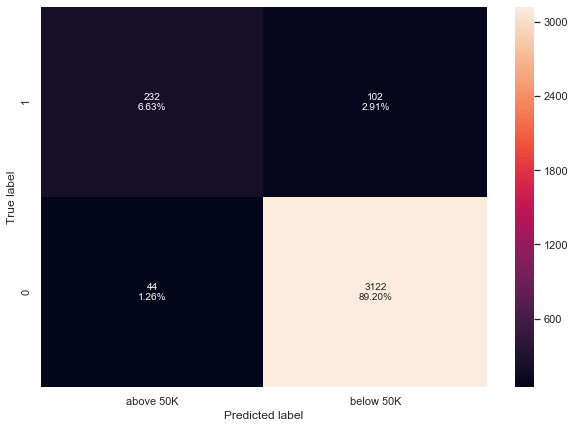

In [429]:
print("confusion matrix = \n")
make_confusion_matrix(ytrain,pred_train )

### Prediction on Test data

confusion matrix = 



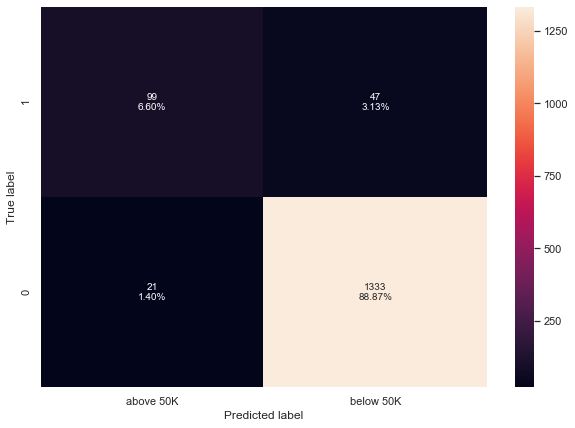

In [423]:
pred_ts = lg.predict(xtest)#predict(X_train)
pred_ts = np.round(pred_ts)
# mat_tst = confusion_matrix(y_test,np.round(pred_ts))

print("confusion matrix = \n")
make_confusion_matrix(ytest,pred_ts )

In [430]:
#Accuracy with a threhold of 0.5
print('Accuracy on train data:',accuracy_score(ytrain, pred_train) )
print('Accuracy on test data:',accuracy_score(ytest, pred_ts))

Accuracy on train data: 0.9582857142857143
Accuracy on test data: 0.9546666666666667


## New AUC ROC Curve

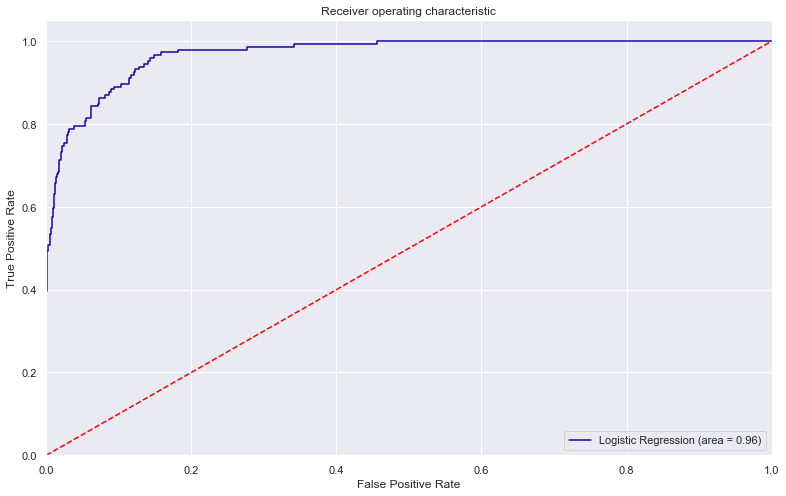

In [431]:
fpr, tpr, thresholds = roc_curve(ytest, lg.predict(xtest))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Optimal threshold

In [432]:
pred_train = lg.predict(xtrain)
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(ytrain, pred_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.14416847900109922


In [434]:
target_names = ['below 50K', 'above 50K']
y_pred_tr = (lg.predict(xtrain)>optimal_threshold).astype(int)
y_pred_ts = (lg.predict(xtest)>optimal_threshold).astype(int)

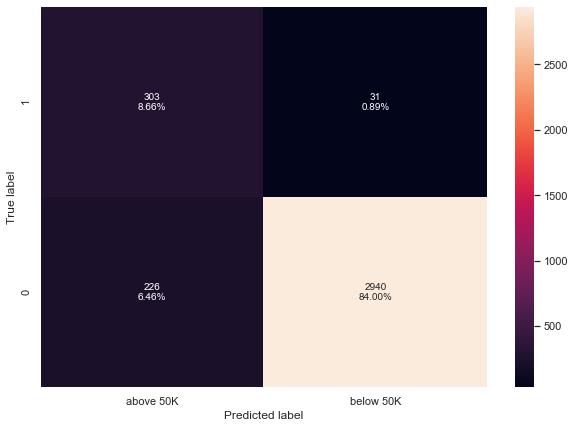

In [436]:
make_confusion_matrix(ytrain,y_pred_tr )

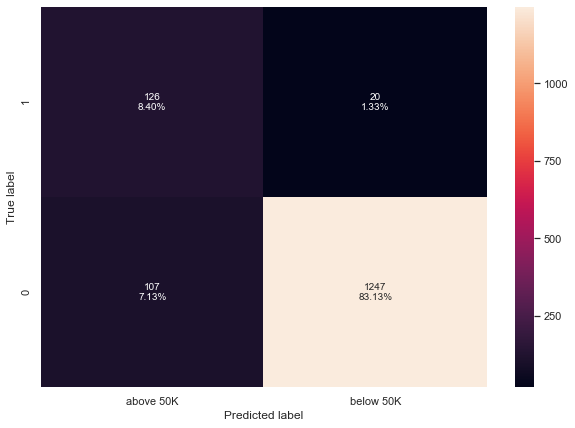

In [437]:
make_confusion_matrix(ytest,y_pred_ts)

In [438]:
#Accuracy with optimal threshold
print('Accuracy on train data:',accuracy_score(ytrain,y_pred_tr) )
print('Accuracy on test data:',accuracy_score(ytest,y_pred_ts))

Accuracy on train data: 0.9265714285714286
Accuracy on test data: 0.9153333333333333


### Observation
- The accuracy on test data is 91% after removing multicollinearity and choosing optimal threshold. 



### ******************************************************************************************

## Build Decision Tree Model
- Building our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [534]:
camod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIPCode               5000 non-null category
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Income2               5000 non-null object
dtypes: category(1), float64(1), int64(11), object(1)
memory usage: 541.3+ KB


In [547]:
# Dropping Zip Code because of so many unique values
camod.drop(["ZIPCode"],axis=1,inplace=True)

In [549]:
# Transforming data Type on Income2 into Category
camod["Income2"] = camod["Income2"].astype("category")

In [550]:
camod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Income2               5000 non-null category
dtypes: category(1), float64(1), int64(11)
memory usage: 473.8 KB


## Splitting Data

In [551]:
## Defining X and Y variables
x = camod.drop(["Personal_Loan"], axis=1)
y = camod["Personal_Loan"]

print(x.head())
print(y.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4   1.60          1         0   
1   45          19      34       3   1.50          1         0   
2   39          15      11       1   1.00          1         0   
3   35           9     100       1   2.70          2         0   
4   35           8      45       4   1.00          2         0   

   Securities_Account  CD_Account  Online  CreditCard Income2  
0                   1           0       0           0    <=49  
1                   1           0       0           0    <=49  
2                   0           0       0           0    <=49  
3                   0           0       0           0  50_149  
4                   0           0       0           1    <=49  
0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64


In [552]:
# Dummy Variables: encoding the categorical variables
x = pd.get_dummies(x, drop_first=True)
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Income2_50_149,Income2_<=49
0,25,1,49,4,1.60,1,0,1,0,0,0,0,1
1,45,19,34,3,1.50,1,0,1,0,0,0,0,1
2,39,15,11,1,1.00,1,0,0,0,0,0,0,1
3,35,9,100,1,2.70,2,0,0,0,0,0,1,0
4,35,8,45,4,1.00,2,0,0,0,0,1,0,1


In [553]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4 , random_state=1)

In [554]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3000, 13)
(2000, 13)
(3000,)
(2000,)


In [555]:
y.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [589]:
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Scoring our Decision Tree

In [590]:
# accuracy on training set
print("Accuracy on train set", model.score(xtrain,ytrain))

# accuracy on test set
print("Accuracy on test set", model.score(xtest,ytest))

Accuracy on train set 1.0
Accuracy on test set 0.9775


In [558]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(xtest)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

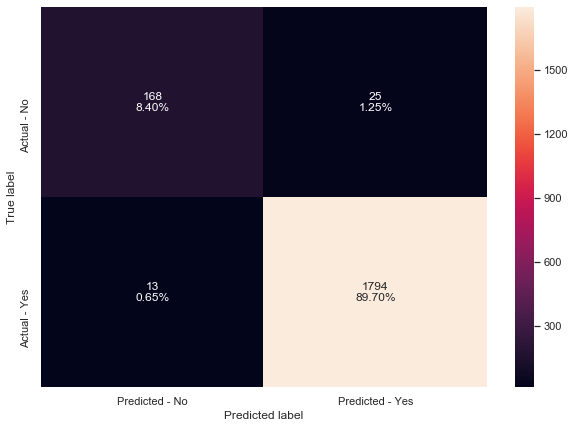

In [559]:
make_confusion_matrix(model,ytest)

In [592]:
ytrain.value_counts(1)

0   0.90
1   0.10
Name: Personal_Loan, dtype: float64

### Observations: 
- With only 10% of positive classes, the model marks each sample as negative and 90% accuracy. Accuracy is not a good option for the evaluation.

In [560]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    print("Recall on training set : ",metrics.recall_score(ytrain,pred_train))
    print("Recall on test set : ",metrics.recall_score(ytest,pred_test))

In [561]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8704663212435233


#### Observations 
- Recall on Training and testing set is very close each other.

### Decision Tree - Visuzalization

In [562]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Income2_50_149', 'Income2_<=49']


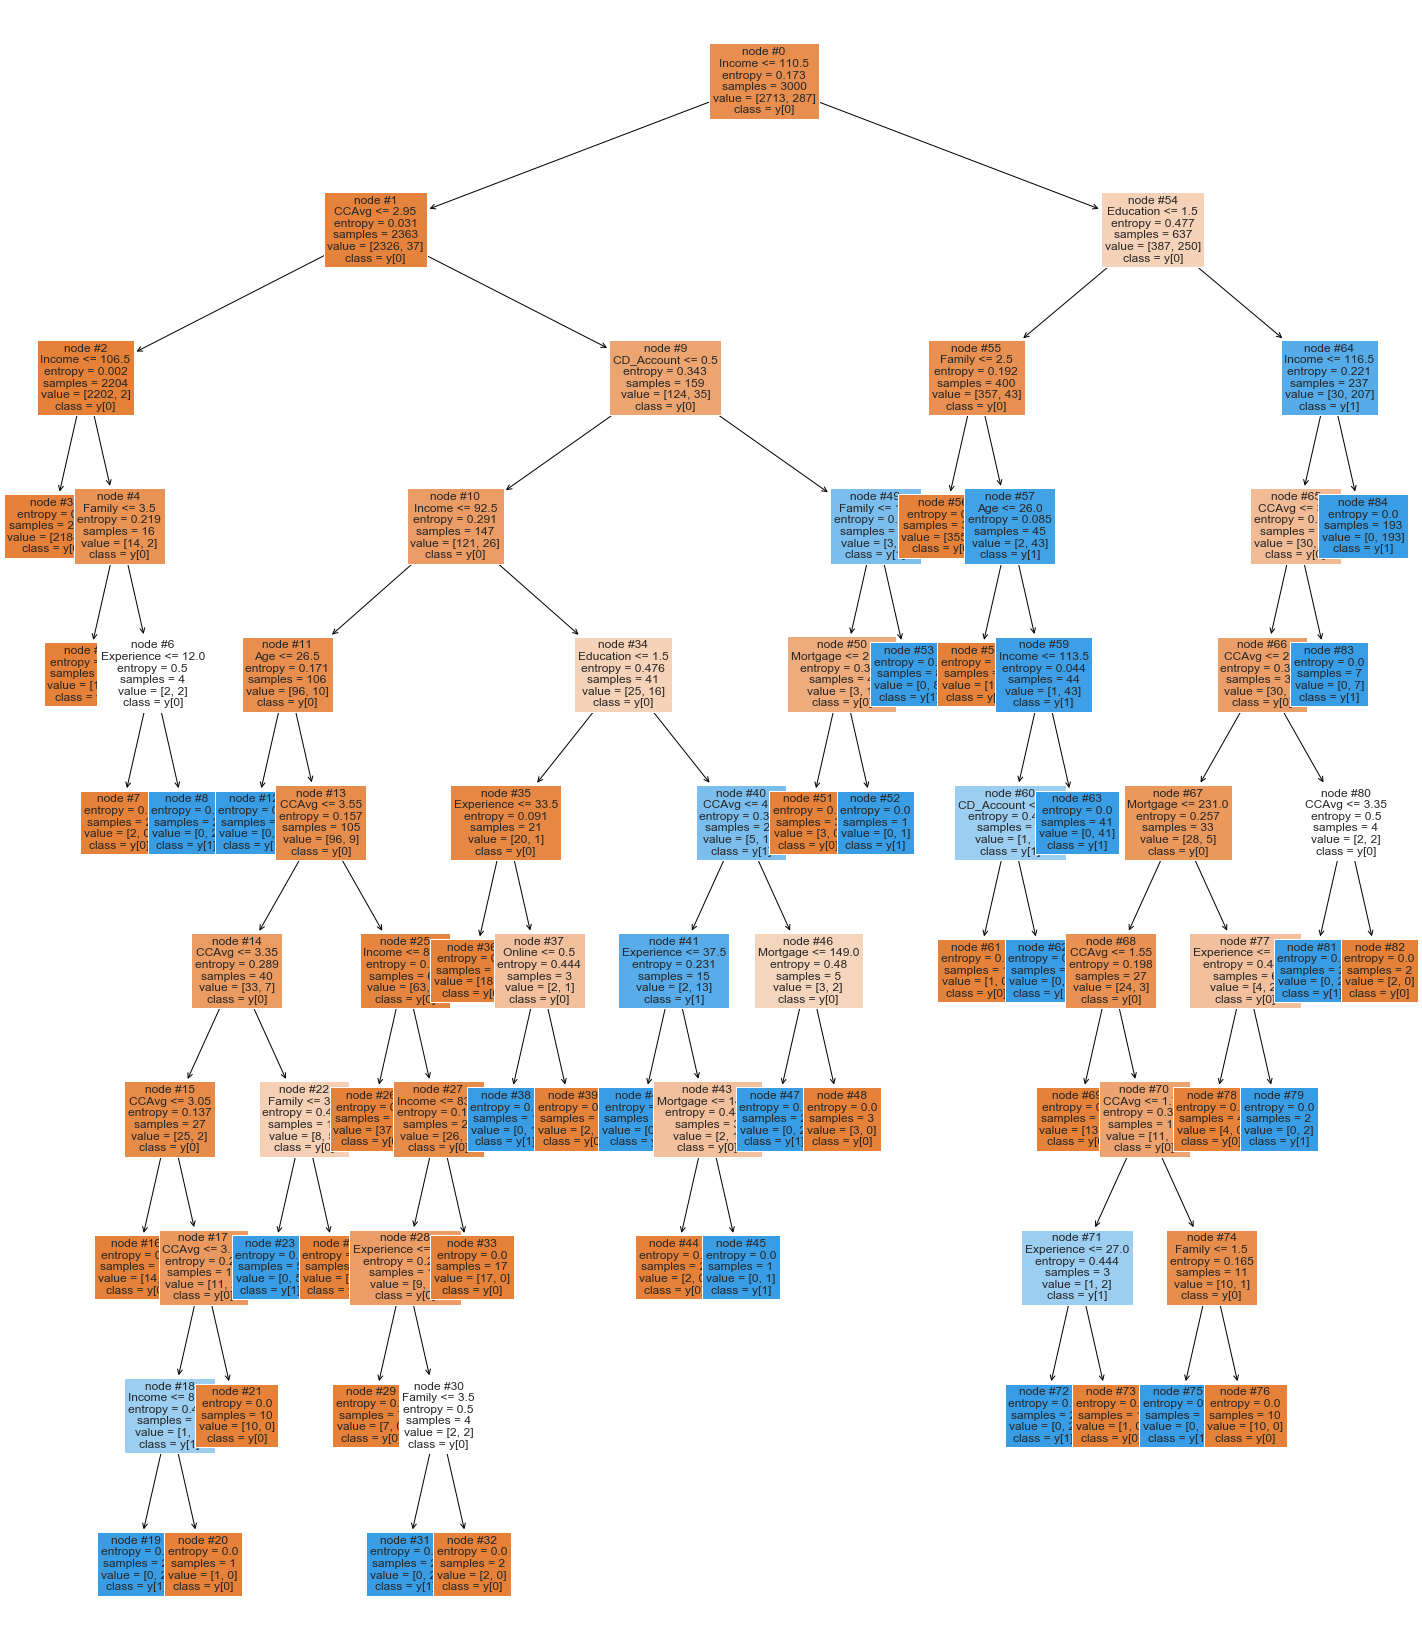

In [565]:
plt.figure(figsize=(25,30))

out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=12,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [566]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2188.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 12.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- Experience >  12.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |   |

In [593]:
# This is Gini Importance or importance of features in the tree building.
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = xtrain.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Income             0.59
Family             0.15
Education          0.14
CCAvg              0.09
Age                0.01
CD_Account         0.01
Mortgage           0.01
Experience         0.00
Securities_Account 0.00
Online             0.00
CreditCard         0.00
Income2_50_149     0.00
Income2_<=49       0.00


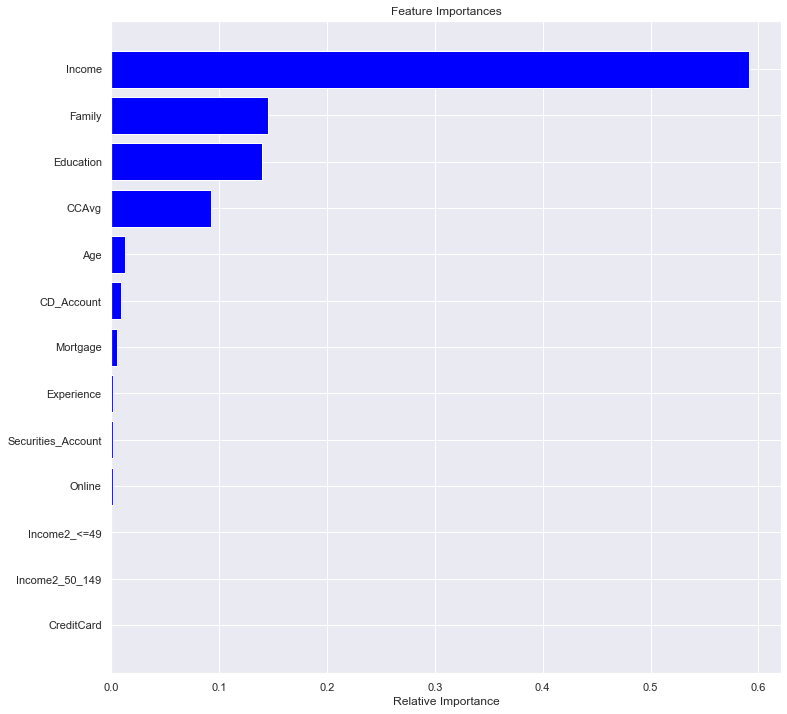

In [595]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='Blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations: 
Income, Family and Education are the top 3 important variable.

### Hyperparameter: GridSearch

In [586]:
from sklearn.model_selection import GridSearchCV

In [596]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'criterion':['entropy','gini'],
              'splitter':['best','random'],
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              'min_impurity_decrease': [0.000001,0.00001,0.0001,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(xtrain, ytrain)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=1e-06, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='random')

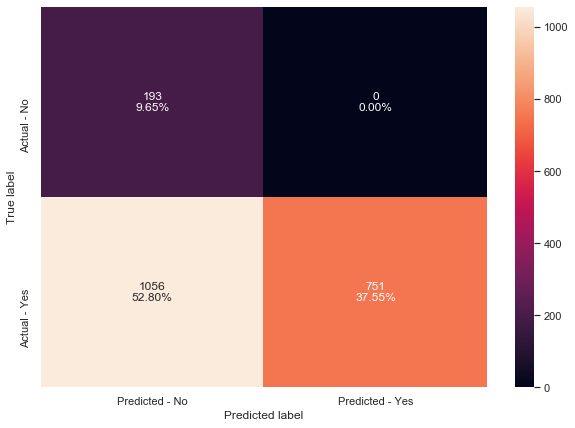

In [597]:
make_confusion_matrix(estimator,ytest)

### Observations
True Positive 9.65% and low True Negative 37.55%

In [598]:
get_recall_score(estimator)

Recall on training set :  1.0
Recall on test set :  1.0


### Observations
Recall has improved for test set after hyperparameter

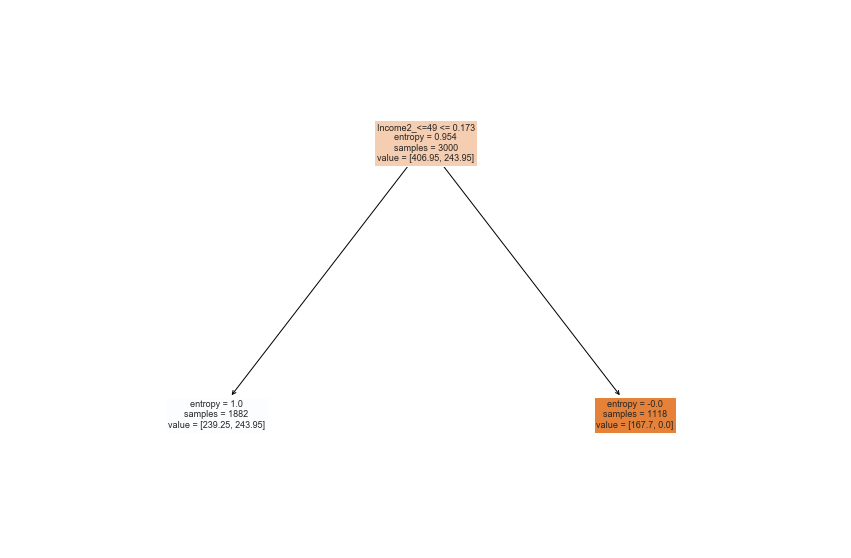

In [599]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [600]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income2_<=49 <= 0.17
|   |--- weights: [239.25, 243.95] class: 1
|--- Income2_<=49 >  0.17
|   |--- weights: [167.70, 0.00] class: 0



In [602]:
#Here we will see that importance of features has increased
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = xtrain.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Income2_<=49       1.00
Age                0.00
Experience         0.00
Income             0.00
Family             0.00
CCAvg              0.00
Education          0.00
Mortgage           0.00
Securities_Account 0.00
CD_Account         0.00
Online             0.00
CreditCard         0.00
Income2_50_149     0.00


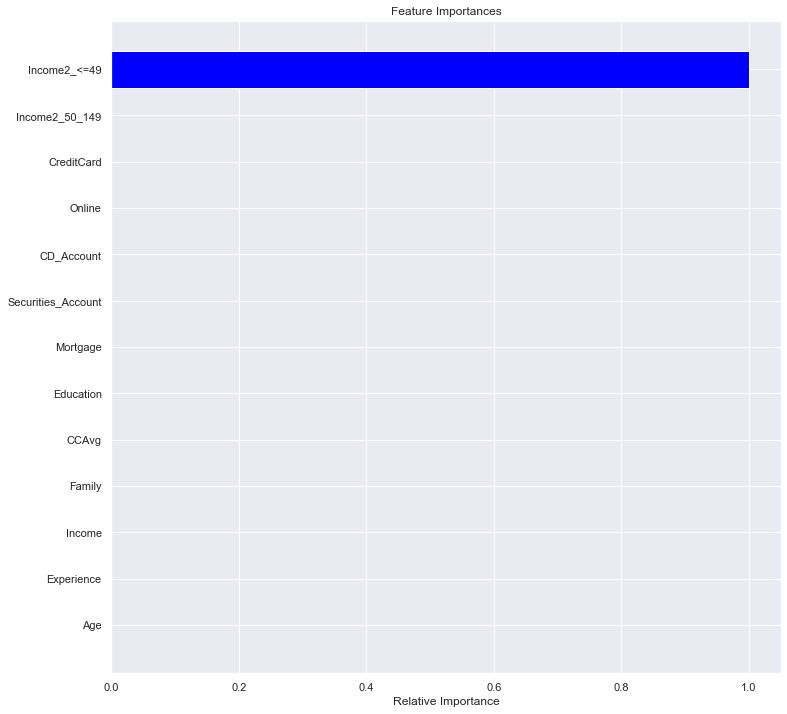

In [603]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='Blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Comparing the decision tree models

In [614]:
from sklearn.tree import DecisionTreeClassifier

In [619]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with hyperparameter tuning'
                                          ], 'Train_Recall':[1,1,], 'Test_Recall':[0.87,1,]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1,0.87
1,Decision treee with hyperparameter tuning,1,1.00


The Decision tree model hyperparameter tuning has given the best recall score on data.

## Conclusion:
- The Personal Loan Campaign was analyzed using the Logistic Regression Model and Decision Tree Model
- The accuracy of the last model analyzed of Logistic Regression Model was 91%.
- We removed multicollinearity and choosing optimal threshold on Logistic Regression
- The accuracy of the last model analyzed of Decision Tree was 100%. Overfitting was not identified. 
- We used the Hyperparameter technique on the Decision Tree model
- For both models, the variable Income is the most important variable
- The Decision Tree model can be used to predict if a customer is going to accept a Personal Loan. 
- The Decision Tree is a simple model demanding less data preparation.
